<a href="https://colab.research.google.com/github/emanbuc/ultrasonic-vision/blob/main/notebooks/multiclass_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        ObjectClass  ...  differentialDistanceFromRoof57
0       EMPTY_SEVEN  ...                           27.24
1       EMPTY_SEVEN  ...                          -66.92
2       EMPTY_SEVEN  ...                          -59.71
3       EMPTY_SEVEN  ...                          -54.14
4       EMPTY_SEVEN  ...                          -55.13
..              ...  ...                             ...
264  SQUARE_MILK_90  ...                          -88.56
265  SQUARE_MILK_90  ...                          -81.20
266  SQUARE_MILK_90  ...                          -80.59
267  SQUARE_MILK_90  ...                          -80.64
268  SQUARE_MILK_90  ...                          -79.93

[269 rows x 6 columns]


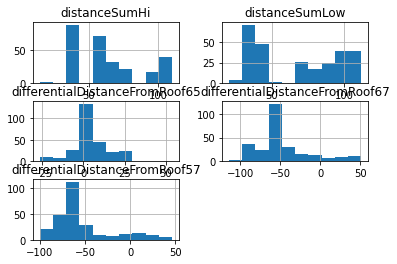

In [1]:
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/dataset/20210102-cleaned.csv"

names = ['ObjectClass','distanceSumHi','distanceSumLow','differentialDistanceFromRoof65','differentialDistanceFromRoof67','differentialDistanceFromRoof57']
data = pandas.read_csv(url, usecols=names)
print(data)
data.hist()
plt.show()

In [2]:
x_train = data[['distanceSumHi','distanceSumLow','differentialDistanceFromRoof65','differentialDistanceFromRoof67','differentialDistanceFromRoof57']]
y_train = data[['ObjectClass']]

In [3]:
x_train

,distanceSumHi,distanceSumLow,differentialDistanceFromRoof65,differentialDistanceFromRoof67,differentialDistanceFromRoof57
0,107.44,109.71,1.33,28.57,27.24
1,107.44,109.68,0.90,-66.02,-66.92
2,107.78,110.13,1.80,-57.91,-59.71
3,107.82,109.73,0.95,-53.19,-54.14
4,107.89,110.02,1.29,-53.84,-55.13
...,...,...,...,...,...
264,59.60,87.68,26.30,-62.26,-88.56
265,60.11,88.52,27.07,-54.13,-81.20
266,60.04,87.93,26.71,-53.88,-80.59
267,60.12,88.20,27.01,-53.63,-80.64


In [4]:
y_train

,ObjectClass
0,EMPTY_SEVEN
1,EMPTY_SEVEN
2,EMPTY_SEVEN
3,EMPTY_SEVEN
4,EMPTY_SEVEN
...,...
264,SQUARE_MILK_90
265,SQUARE_MILK_90
266,SQUARE_MILK_90
267,SQUARE_MILK_90


In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, np.ravel(y_train))
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [9]:
x_test= [59,87,26,-53,-79]

In [10]:
clf.predict([x_test])

array(['SQUARE_MILK_90'], dtype=object)

## Salvataggio Modello addestrato

In [19]:
import pickle
from google.colab import files
filename='svm_classificator_model_pickle.pkl'
pickle.dump(clf, open(filename, 'wb'))
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Caricamento modello da file

In [18]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.predict([x_test])

array(['SQUARE_MILK_90'], dtype=object)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
uploaded = drive. .CreateFile({'title': '20210102-cleaned.csv'})
uploaded.SetContentFile('20210102-cleaned')
uploaded.Upload()